Estudo Dados Airbnb Rotterdam

In [1]:
#Import das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

#carregamento do Data_frame para o programa
calendar_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\calendar.csv')
listings_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\listings.csv')

In [2]:
#calendar_df.columns
##'listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights'

#preparar os dados e tirar os caracteres especiais
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

Separar avaliação do 'name' do DataFram Listings

In [3]:
row = listings_df['name']

for index, palavra in enumerate(row):
    for indice, letra in enumerate(palavra):
        if letra =='★':
                if palavra[indice+1] != 'N' :
                    avaliacao = palavra[indice + 1: indice + 5]
                    listings_df.loc[index, 'avaliacao'] = avaliacao
                    break;
                else:
                    avaliacao = palavra[indice + 1: indice + 4]
                    listings_df.loc[index, 'avaliacao'] = avaliacao
                    break;
        
listings_df['avaliacao']

0       4.95
1       4.78
2       4.83
3       4.72
4       4.92
        ... 
1035     New
1036     New
1037     New
1038     New
1039     New
Name: avaliacao, Length: 1040, dtype: object

Estatistica Descritiva (Calendar)

Analise ao preço - Qual é a média de preços dos aluguéis no Airbnb na cidade?


In [4]:
row, columm = calendar_df.shape #mostra o número de linhas e o número de colunas
print(f"Ficheiro tem {row} Linhas e {columm} Colunas \n")

#Preço medio da estadia
price_mean = calendar_df['price'].mean()
print(f"O preço médio: {price_mean:.2f}$")

#Preço medio da estadia
price_min = calendar_df['price'].min()
print(f"O preço mais baixo: {price_min:.0f}$")

#Preço medio da estadia
price_max = calendar_df['price'].max()
print(f"O preço mais alto: {price_max:.0f}$")

#Preço medio da estadia
price_mode = calendar_df['price'].mode().values[0]
print(f"O preço mais aplicado: {price_mode:.0f}$")

#O coeficiente de assimetria da idade é: 7.212379118954113
# É positivo logo a cauda direita é mais longa comparada com a esquerda
price_assimetria = calendar_df['price'].skew()
print(f"O coeficiente de assimetria da idade é: {price_assimetria:.2f}")

#Cortose - distribuição dos preços é mais concentrada perto da media
#Pouca diversidade de preços, com certos preços muito baixos
price_curtose = calendar_df['price'].kurtosis()
print(f"O coeficiente de curtose da idade é: {price_curtose:.2f}")

Ficheiro tem 379600 Linhas e 7 Colunas 

O preço médio: 161.50$
O preço mais baixo: 20$
O preço mais alto: 10500$
O preço mais aplicado: 150$
O coeficiente de assimetria da idade é: 7.21
O coeficiente de curtose da idade é: 271.93


Estatistica Descritiva (Listings)

Valor medio Bairro - Quais são os bairros mais caros e mais baratos para alugar no Airbnb?


In [5]:
#Criar um DF agroupado por bairros com a media do Preço, é ordenado em ordem crescente (mais pequeno mais alto)
bairros_df = listings_df.groupby('neighbourhood_group')['price'].mean()
bairros_df=bairros_df.sort_values(ascending=True)

#Automatização de quantidade de cidades para mostrar
lista_top=5

print(f"top 5 dos preços mais baixos:")
for bairro, preço in bairros_df.head(lista_top).items():
    print(f"\t{bairro} : {preço:.2f}$")


print(f"\ntop 5 dos preços mais altos:")
for bairro, preço in bairros_df[-1:-(lista_top+1):-1].items():
    print(f"\t{bairro} : {preço:.2f}$")


print("\n\n")

#preço medio de cada bairro ordenado
for bairro, preço in bairros_df.items():
    print(f"O preço médio em {bairro} é de: {preço:.2f}$")

    



top 5 dos preços mais baixos:
	Botlek-Europoort-Maasvlakte : 80.00$
	Pernis : 90.00$
	Charlois : 106.65$
	Hoek van Holland : 119.82$
	Prins Alexander : 123.78$

top 5 dos preços mais altos:
	Hoogvliet : 816.67$
	Rozenburg : 199.00$
	Feijenoord : 176.01$
	Rotterdam Centrum : 174.80$
	Hillegersberg-Schiebroek : 162.13$



O preço médio em Botlek-Europoort-Maasvlakte é de: 80.00$
O preço médio em Pernis é de: 90.00$
O preço médio em Charlois é de: 106.65$
O preço médio em Hoek van Holland é de: 119.82$
O preço médio em Prins Alexander é de: 123.78$
O preço médio em Noord é de: 132.52$
O preço médio em Overschie é de: 132.65$
O preço médio em IJsselmonde é de: 144.56$
O preço médio em Waalhaven-Eemhaven é de: 147.00$
O preço médio em Kralingen-Crooswijk é de: 149.46$
O preço médio em Delfshaven é de: 149.69$
O preço médio em Hillegersberg-Schiebroek é de: 162.13$
O preço médio em Rotterdam Centrum é de: 174.80$
O preço médio em Feijenoord é de: 176.01$
O preço médio em Rozenburg é de: 199.

Room-type - Quais são os tipos de propriedades mais comuns

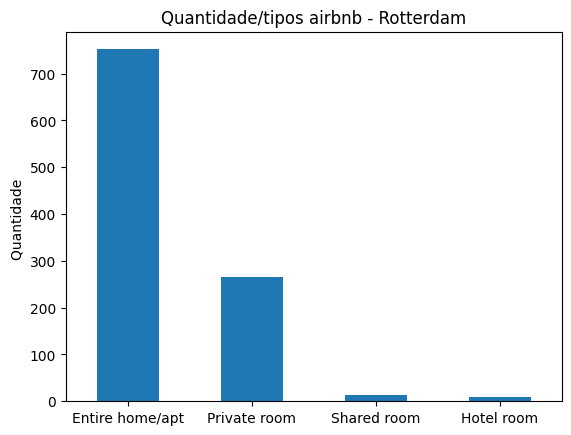

In [6]:
room_type=listings_df['room_type'].value_counts()
room_type

# Criando o gráfico de barras empilhadas
room_type.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Quantidade ')
plt.title('Quantidade/tipos airbnb - Rotterdam')
plt.xticks(rotation=0)  # Para manter os rótulos das categorias na horizontal
plt.show()
